In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [48]:
Housing = pd.read_csv (r"C:\Users\D COMSIT\Desktop\Data Science Advanced Class\Housing_dataset_train.csv")

In [49]:
Housing.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [50]:
Housing.tail()

,ID,loc,title,bedroom,bathroom,parking_space,price
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718
13999,8787,Nasarawa,NaN,9.0,7.0,5.0,2858516.890


In [51]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [52]:
Housing.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [53]:
Housing.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [54]:
Housing.drop('ID', axis=1, inplace=True)

In [55]:
Housing.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [56]:
Housing['loc'].fillna(Housing['loc'].mode()[0], inplace=True)

In [57]:
Housing['title'].fillna(Housing['title'].mode()[0], inplace=True)

In [58]:
Housing['bedroom'].fillna(Housing['bedroom'].median(), inplace=True)

In [59]:
Housing['bathroom'].fillna(Housing['bathroom'].median(), inplace=True)

In [60]:
Housing['parking_space'].fillna(Housing['parking_space'].median(), inplace=True)

In [61]:
Housing.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [62]:
Housing.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,Ekiti,Flat,7.0,5.0,3.0,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898


In [63]:
Housing.tail()

,loc,title,bedroom,bathroom,parking_space,price
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,Delta,Flat,4.0,6.0,1.0,3348918.718
13999,Nasarawa,Flat,9.0,7.0,5.0,2858516.890


<Axes: >

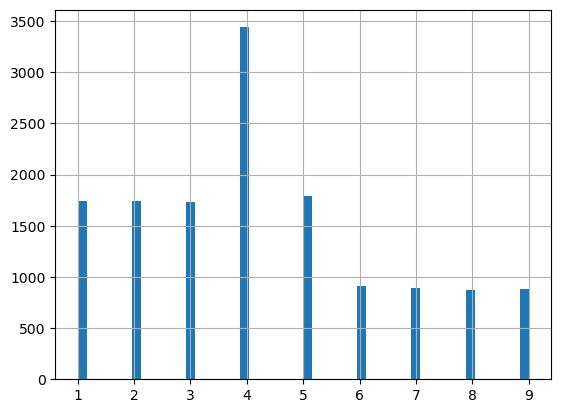

In [65]:
Housing.bedroom.hist(bins=50)

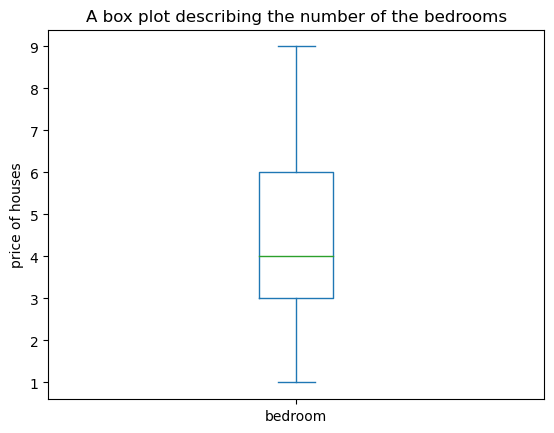

In [66]:
Housing["bedroom"].plot(kind="box")
plt.title("A box plot describing the number of the bedrooms")
plt.ylabel("price of houses")
plt.show()

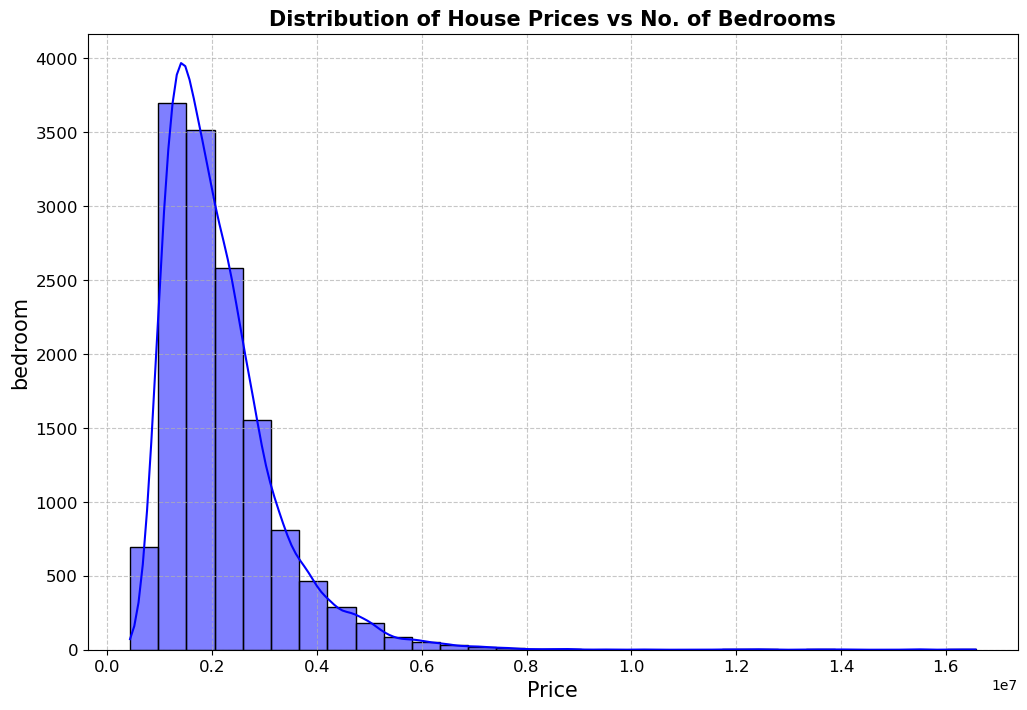

In [99]:
plt.figure(figsize=(12, 8))
sns.histplot(Housing['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices vs No. of Bedrooms', fontsize=15, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('bedroom', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

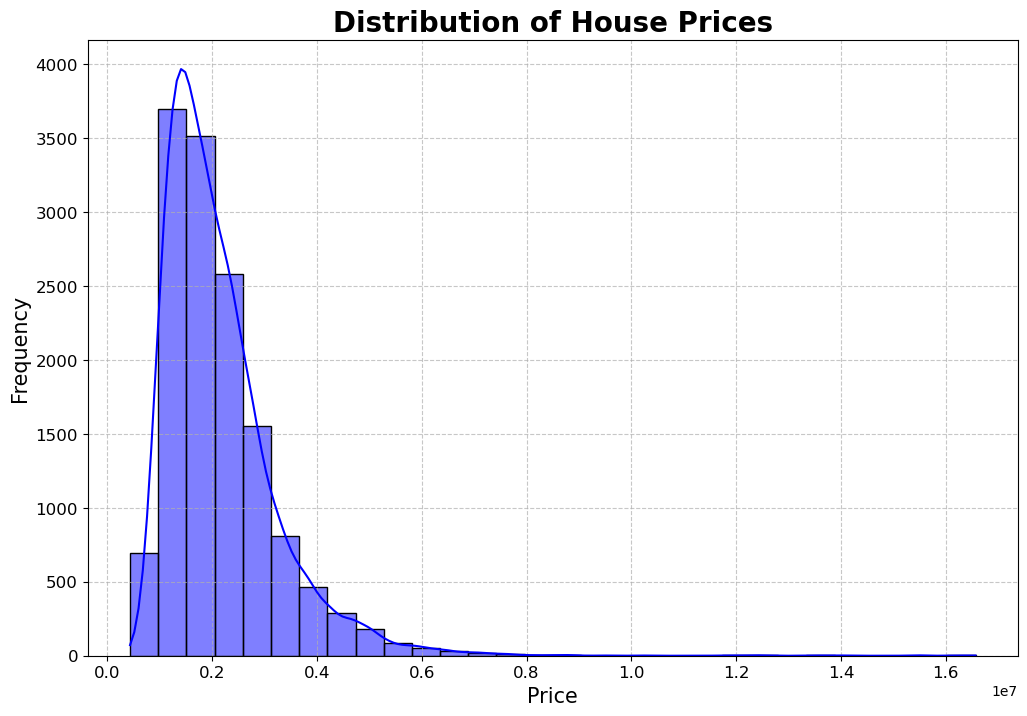

In [97]:
plt.figure(figsize=(12, 8))
sns.histplot(Housing['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

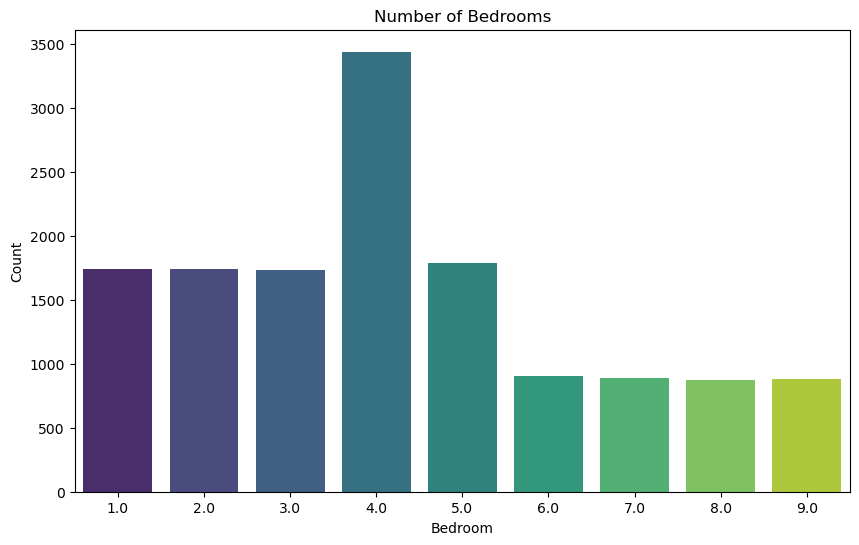

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedroom', data=Housing, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedroom') 
plt.ylabel('Count')
plt.show()

<Axes: >

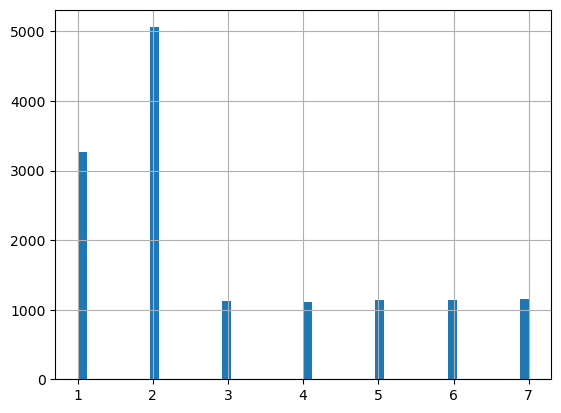

In [108]:
Housing.bathroom.hist(bins=50)

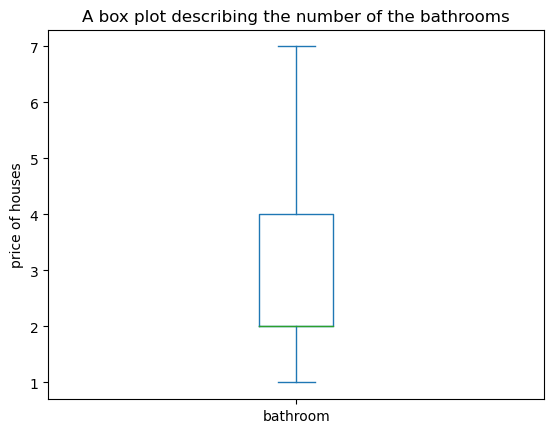

In [107]:
Housing["bathroom"].plot(kind="box")
plt.title("A box plot describing the number of the bathrooms")
plt.ylabel("price of houses")
plt.show()

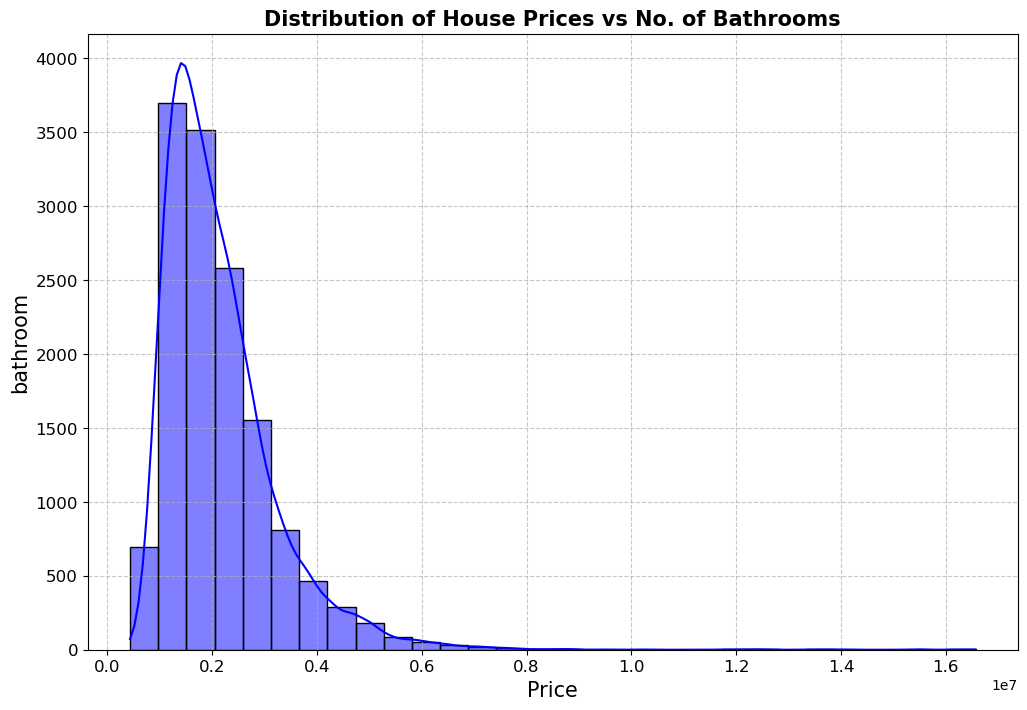

In [106]:
plt.figure(figsize=(12, 8))
sns.histplot(Housing['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices vs No. of Bathrooms', fontsize=15, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('bathroom', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

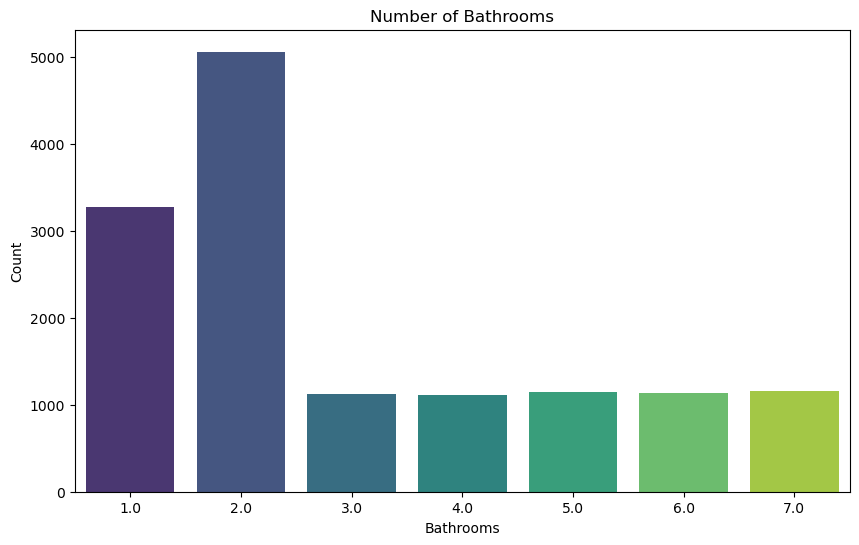

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathroom', data=Housing, palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms') 
plt.ylabel('Count')
plt.show()

<Axes: >

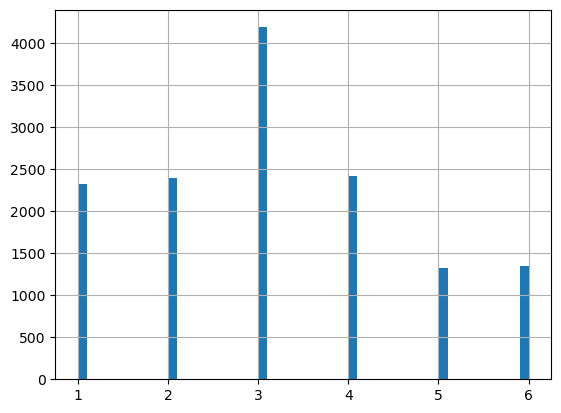

In [109]:
Housing.parking_space.hist(bins=50)

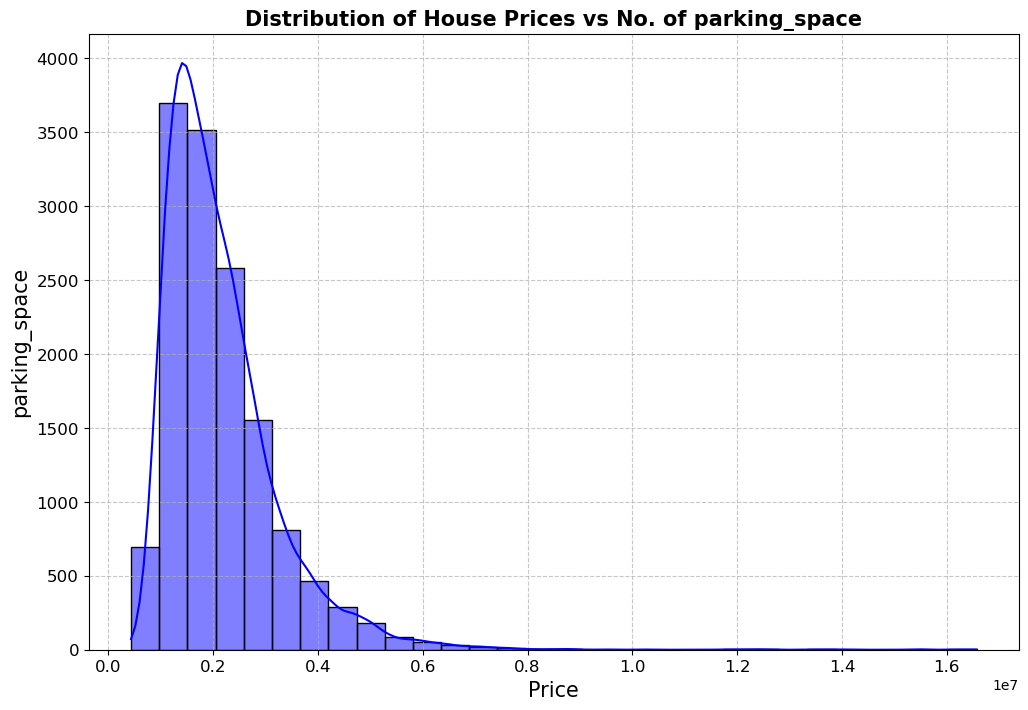

In [111]:
plt.figure(figsize=(12, 8))
sns.histplot(Housing['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices vs No. of parking_space', fontsize=15, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('parking_space', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [68]:
X = Housing[['bedroom','bathroom','parking_space']]
y = Housing.price

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80, random_state=2)

In [71]:
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)
y_pred

array([2649395.60841287, 2051261.21300857, 1736572.24745298, ...,
       2125707.38349719, 1992009.30512415, 1752621.52055564])

In [75]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [84]:
print(f"The Mean Squared Error is: {mse}")
print(f"The R-Squared is: {r2}")

The Mean Squared Error is: 833220388681.4042
The R-Squared is: 0.2794565368999552


In [86]:
X = Housing[['bedroom','bathroom','parking_space']]
y = Housing.price

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4)

In [88]:
model = LinearRegression()

In [89]:
model.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(X_test)
y_pred

array([1734684.68124789, 2522121.42897996, 1710488.46488162, ...,
       1576108.53272626, 1377837.02594848, 2028793.54995932])

In [91]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [92]:
print(f"The Mean Squared Error is: {mse}")
print(f"The R-Squared is: {r2}")

The Mean Squared Error is: 833220388681.4042
The R-Squared is: 0.2794565368999552


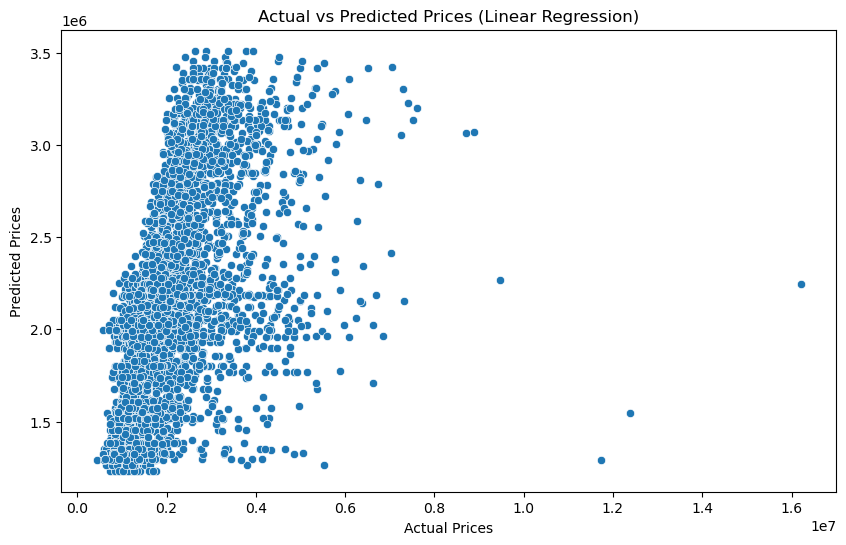

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

In [147]:
X = Housing[['bedroom','bathroom']]
y = Housing.price

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80, random_state=2)

In [149]:
model = LinearRegression()

In [150]:
model.fit(X_train, y_train)

LinearRegression()

In [151]:
y_pred = model.predict(X_test)
y_pred

array([2693852.3803847 , 2016184.22596117, 1628303.6982011 , ...,
       2016184.22596117, 1952285.98410555, 1790294.84115333])

In [152]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [153]:
print(f"The Mean Squared Error is: {mse}")
print(f"The R-Squared is: {r2}")

The Mean Squared Error is: 889645720764.1093
The R-Squared is: 0.25263542997036037


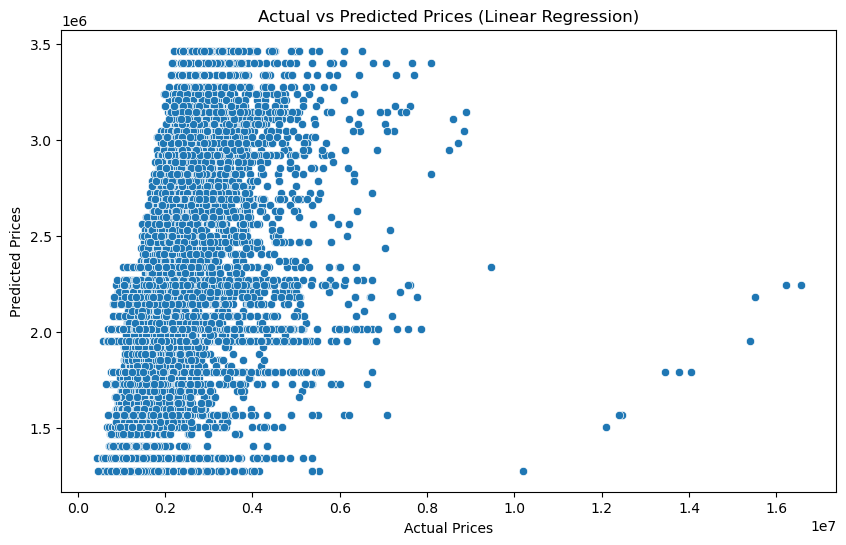

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

In [155]:
correlation_matrix = Housing.corr()

C:\Users\D COMSIT\AppData\Local\Temp\ipykernel_21684\246279844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Housing.corr()


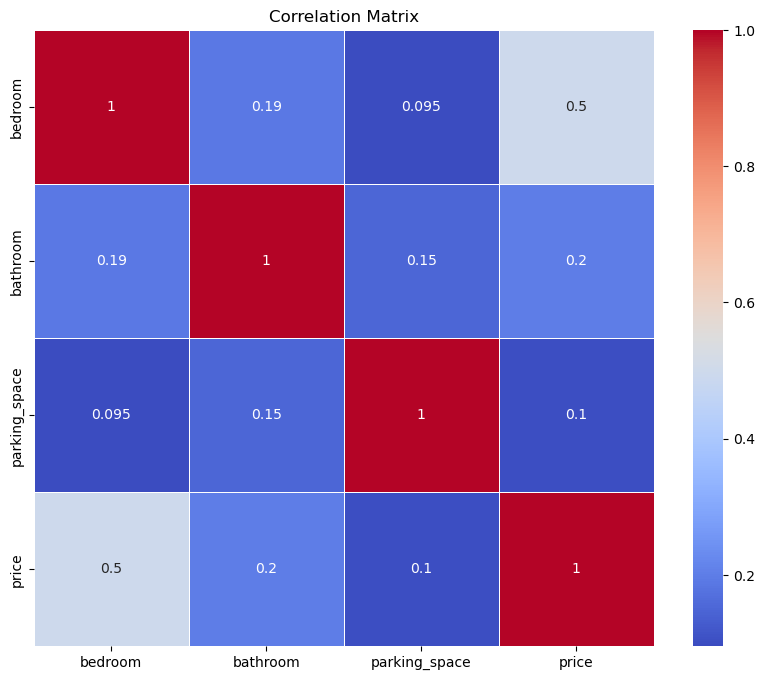

In [156]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [143]:
Housing.fill.na(0)

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,Ekiti,Flat,7.0,5.0,3.0,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,Delta,Flat,4.0,6.0,1.0,3348918.718


In [122]:
Housing.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

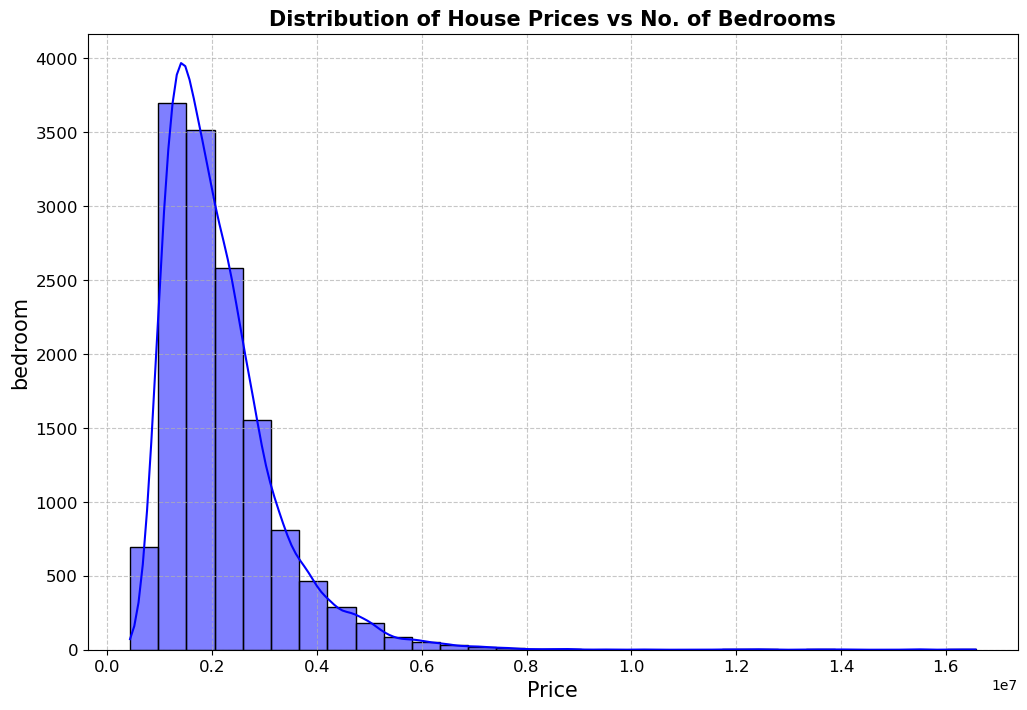

In [123]:
plt.figure(figsize=(12, 8))
sns.histplot(Housing['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices vs No. of Bedrooms', fontsize=15, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('bedroom', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

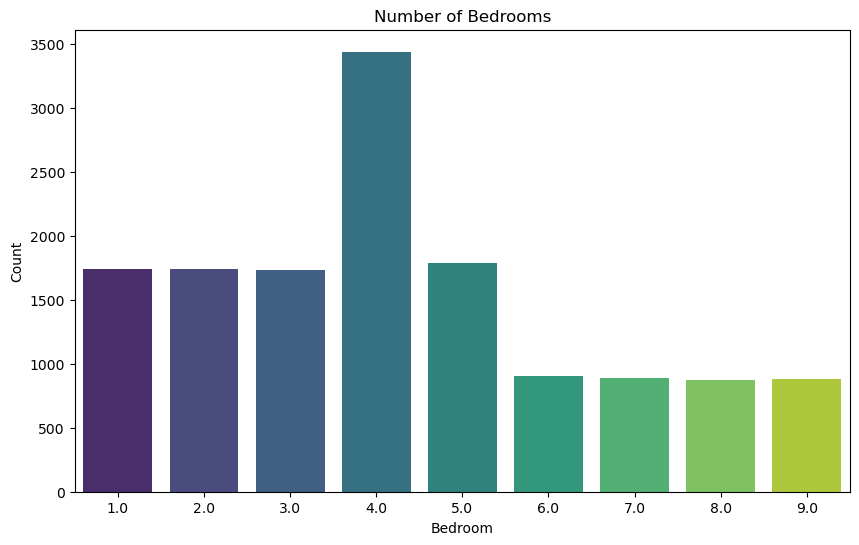

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedroom', data=Housing, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedroom') 
plt.ylabel('Count')
plt.show()

In [158]:
X = Housing[['bedroom','bathroom', 'parking_space']]
y = Housing.price

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.80, random_state=4)

In [160]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2800, 3)
(11200, 3)
(2800,)
(11200,)


In [161]:
model = DecisionTreeRegressor()

In [162]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [163]:
y_pred = model.predict(X_test)

In [164]:
mse = mean_squared_error(y_test,y_pred)
mse

1012762181088.424

In [166]:
r2 = r2_score(y_test, y_pred)
print(f"The R-Squared is: {r2}")

The R-Squared is: 0.13306703045682333


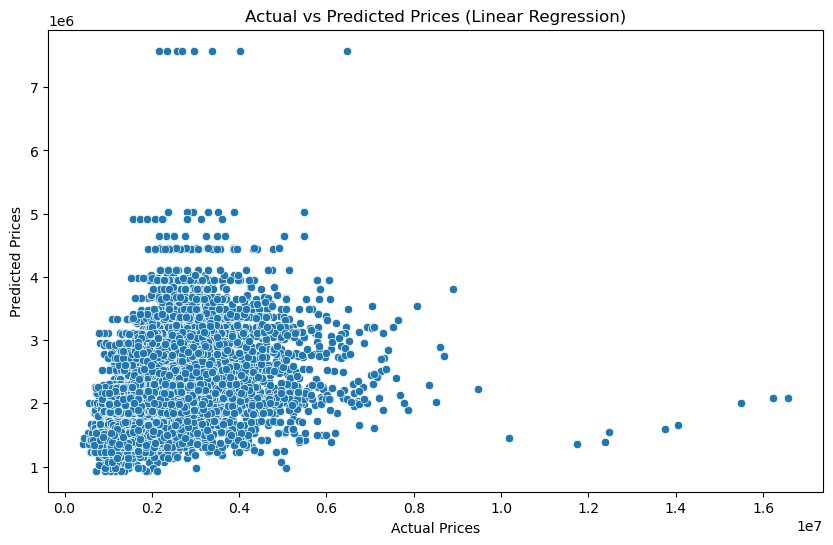

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()